In [157]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [134]:
#imports
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

data = pd.read_csv(f"{RUTA}/data/df_listo.csv", encoding='latin1', sep=',', on_bad_lines='skip')
data.shape

C:\Users\sergi\AppData\Local\Temp\ipykernel_5860\1059325609.py:11: DtypeWarning: Columns (8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f"{RUTA}/data/df_listo.csv", encoding='latin1', sep=',', on_bad_lines='skip')


(1984473, 35)

In [141]:
print("*************************************************\n")

print(f"Valores dupllicados: {data.duplicated().sum()}\n")
print("*************************************************\n")

print("Valores nulos: \n")
print(data.isnull().sum())

print("*************************************************\n")
print(data.info())

*************************************************

Valores dupllicados: 163651

*************************************************

Valores nulos: 

Amount                         163955
Is_Fraud                       163955
IngresoPerCapita               163955
IngresoAnual                   163955
DebitoTotal                    163955
FICO_Score                     163955
Year                           163955
Month                          163955
Dia_Semana                     163955
Time                           163955
BancoCredito                   163955
TipoTarjeta                    163955
LimiteCredito                  163955
Errors_Bad CVV                 163955
Errors_Bad Card Number         163955
Errors_Bad Expiration          163955
Errors_Bad PIN                 163955
Errors_Bad Zipcode             163955
Errors_Insufficient Balance    163955
Errors_SIN ERROR               163955
Errors_Technical Glitch        163955
Dia_Semana_Domingo             163955
Dia_Semana_Jueve

Elegir columnas de interés


In [128]:
new_data = data.drop(columns=['Dia_Semana','Time','BancoCredito','TipoTarjeta'])

In [129]:
print(new_data.shape)
print(pd.Series(new_data['Is_Fraud']).value_counts())

(1984473, 31)
Is_Fraud
0.0    1818662
1.0       1856
Name: count, dtype: int64


In [143]:
new_data = new_data.dropna()

In [153]:
print("*************************************************\n")

print(f"Valores duplicados: {new_data.duplicated().sum()}\n")
print("*************************************************\n")

print("Valores nulos: \n")
print(new_data.isnull().sum())

*************************************************

Valores duplicados: 0

*************************************************

Valores nulos: 

Amount                         0
Is_Fraud                       0
IngresoPerCapita               0
IngresoAnual                   0
DebitoTotal                    0
FICO_Score                     0
Year                           0
Month                          0
LimiteCredito                  0
Errors_Bad CVV                 0
Errors_Bad Card Number         0
Errors_Bad Expiration          0
Errors_Bad PIN                 0
Errors_Bad Zipcode             0
Errors_Insufficient Balance    0
Errors_SIN ERROR               0
Errors_Technical Glitch        0
Dia_Semana_Domingo             0
Dia_Semana_Jueves              0
Dia_Semana_Lunes               0
Dia_Semana_Martes              0
Dia_Semana_MiÃ©rcoles          0
Dia_Semana_SÃ¡bado             0
Dia_Semana_Viernes             0
BancoCredito_Amex              0
BancoCredito_Discover          0


In [152]:
new_data[new_data.duplicated()]

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,LimiteCredito,Errors_Bad CVV,...,Dia_Semana_MiÃ©rcoles,Dia_Semana_SÃ¡bado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)


In [151]:
new_data=new_data.drop_duplicates(keep="first")

In [154]:
pd.Series(new_data['Is_Fraud']).unique()

array([0., 1.])

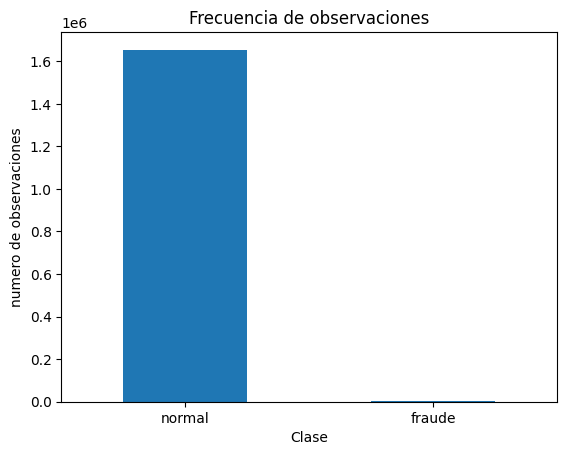

In [156]:
count_classes = pd.Series(new_data['Is_Fraud']).value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(pd.Series(new_data['Is_Fraud']).unique(),labels=['normal', 'fraude'])
plt.title("Frecuencia de observaciones")
plt.xlabel("Clase")
plt.ylabel("numero de observaciones");

Modelo


In [159]:
#definimos nuestras etiquetas y features
y = new_data['Is_Fraud']
X = new_data.drop('Is_Fraud', axis=1)

In [160]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

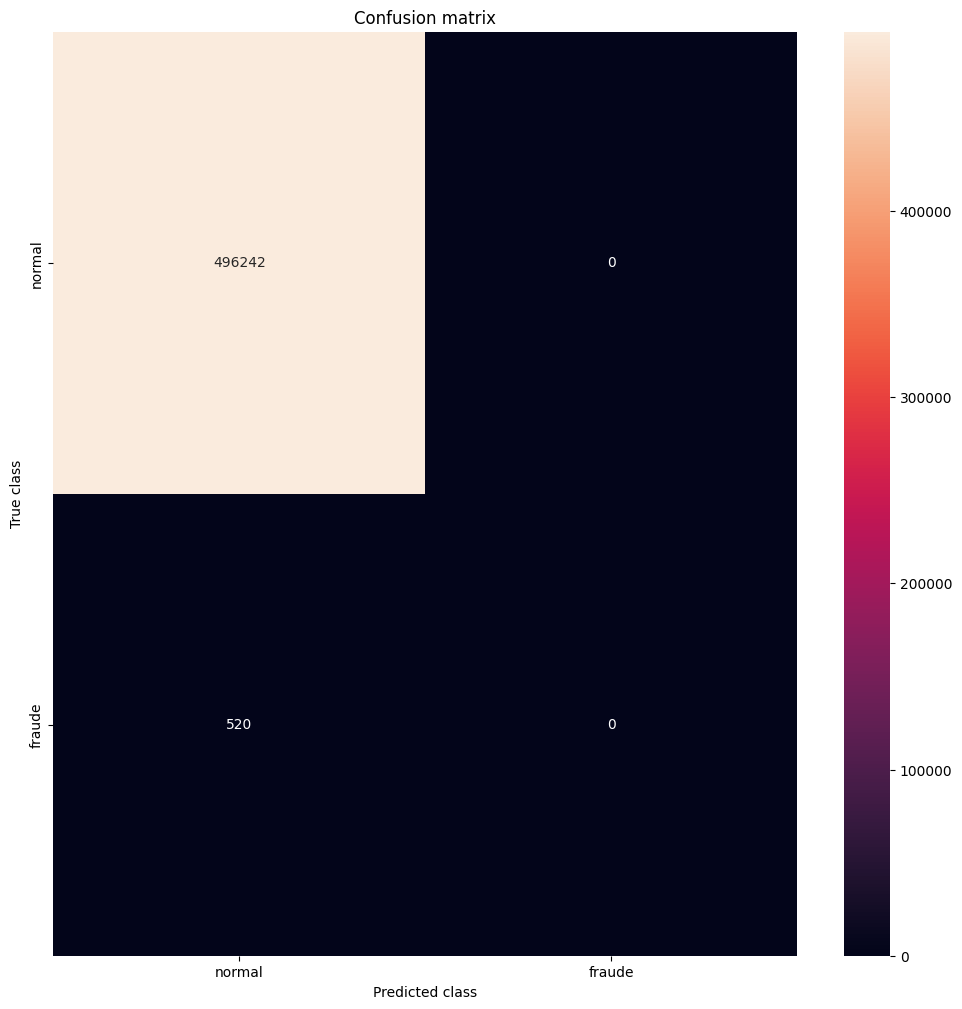

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    496242
         1.0       1.00      0.00      0.00       520

    accuracy                           1.00    496762
   macro avg       1.00      0.50      0.50    496762
weighted avg       1.00      1.00      1.00    496762



In [167]:
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=['normal', 'fraude'], yticklabels=['normal', 'fraude'], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,zero_division=1))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)